In [1]:
import os
os.chdir('E:\\ABC')

# DATA LOADING

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("hpc_breakdowns.csv",parse_dates=['Date'],index_col=['Date'])#load data from csv file into pandas dataframe.
ptest=df.iloc[-200000:,:]
cdf=df.iloc[0:-200000,:]
cdf

,Unnamed: 0,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,,
2006-12-16,0,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,1,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,2,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,3,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,4,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2010-02-07,1862789,07:53:00,0.450,0.322,236.90,2.4,0.0,2.0,1.0
2010-02-07,1862790,07:54:00,0.386,0.216,236.69,1.8,0.0,0.0,0.0
2010-02-07,1862791,07:55:00,0.378,0.204,236.54,1.8,0.0,0.0,1.0


In [3]:
cdf.loc[cdf.duplicated(),:]

,Unnamed: 0,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,,


In [ ]:
#cdf.drop_duplicates(inplace=True)

# DATA ANALYSIS(sample)

In [4]:
sample=cdf.iloc[:10000,:]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


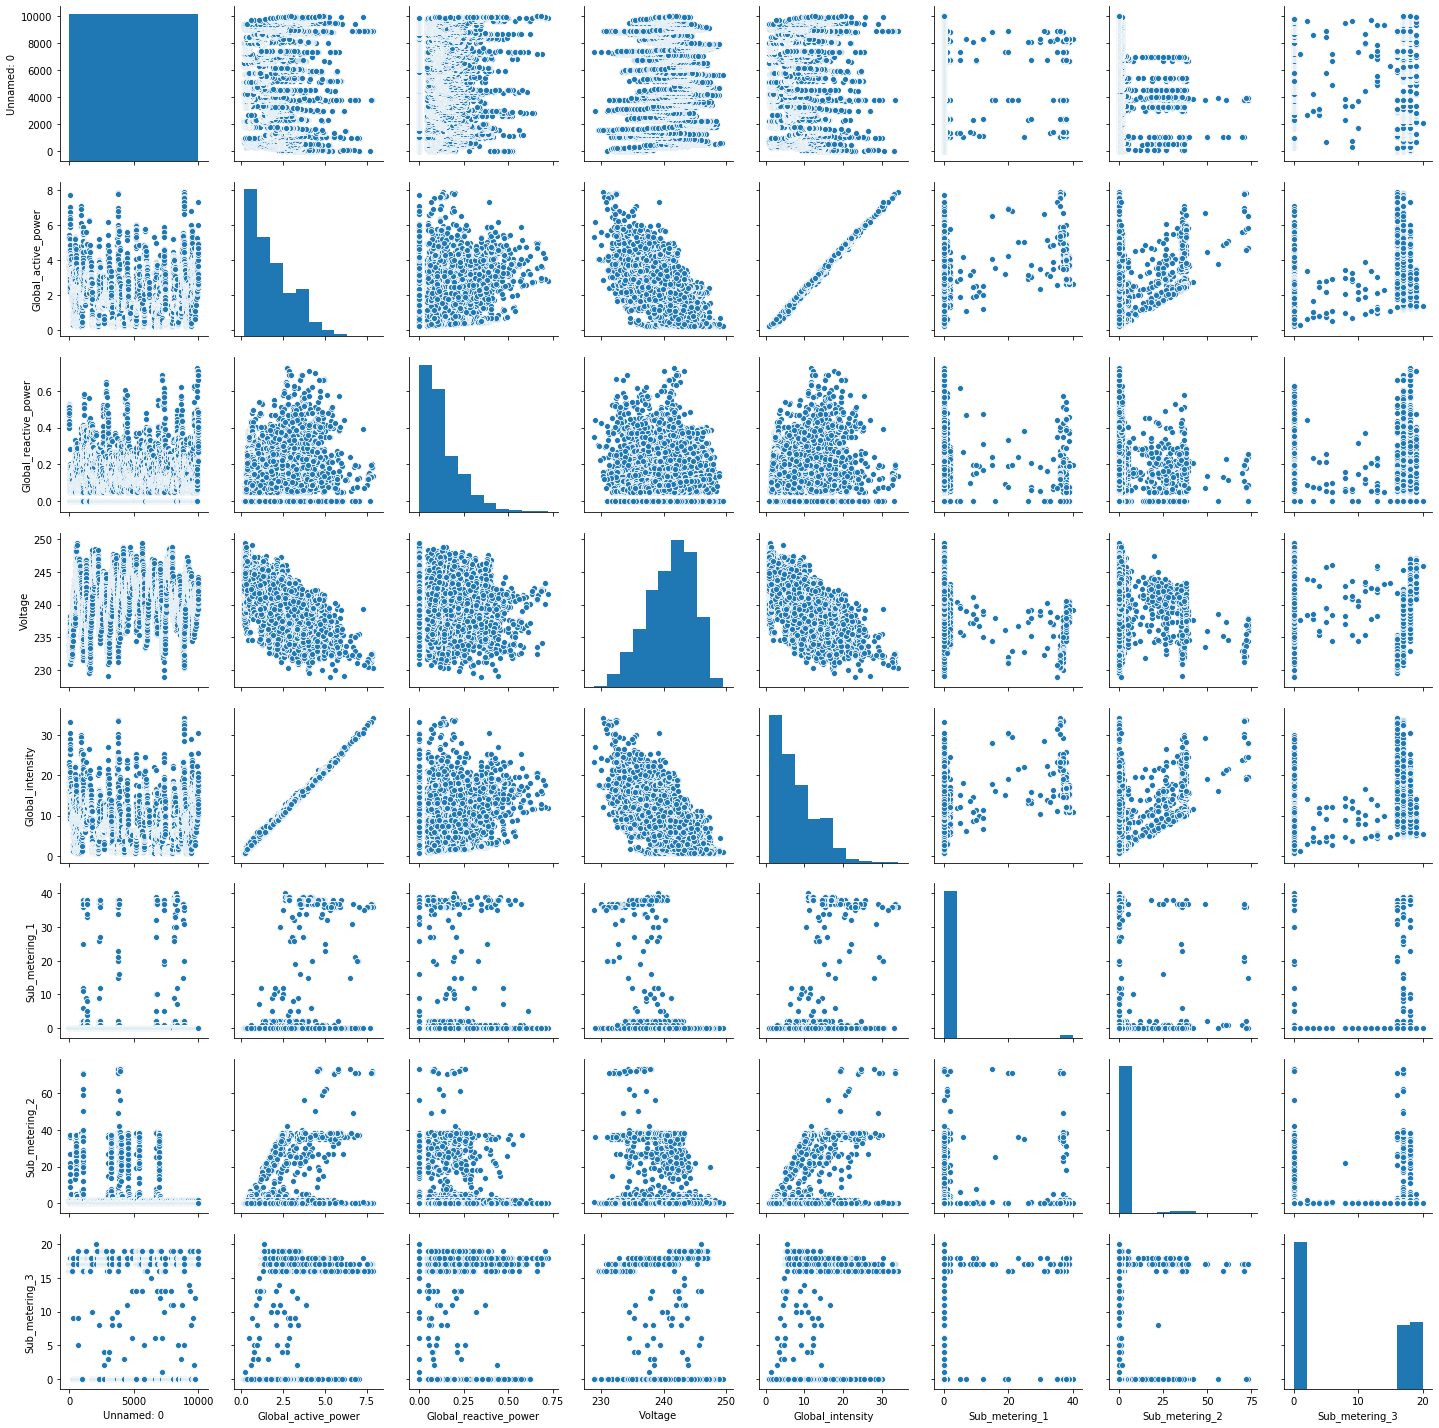

In [5]:
sns.pairplot(sample)#patterns of features

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2006-12-16 to 2006-12-23
Data columns (total 9 columns):
Unnamed: 0               10000 non-null int64
Time                     10000 non-null object
Global_active_power      9971 non-null float64
Global_reactive_power    10000 non-null float64
Voltage                  10000 non-null float64
Global_intensity         9947 non-null float64
Sub_metering_1           9961 non-null float64
Sub_metering_2           10000 non-null float64
Sub_metering_3           10000 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
sample.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,9971.000000,10000.000000,10000.000000,9947.000000,9961.000000,10000.000000,10000.000000
mean,5000.132200,1.748398,0.118914,241.085876,7.410938,0.888565,2.079400,8.244800
std,2887.644642,1.339613,0.111726,3.673339,5.641107,5.490118,7.674398,8.735863
min,0.000000,0.194000,0.000000,228.910000,0.800000,0.000000,0.000000,0.000000
25%,2499.750000,0.390000,0.000000,238.500000,1.800000,0.000000,0.000000,0.000000
50%,4999.500000,1.480000,0.100000,241.550000,6.200000,0.000000,0.000000,0.000000
75%,7501.250000,2.574000,0.178000,243.920000,10.800000,0.000000,1.000000,17.000000
max,10001.000000,7.884000,0.724000,249.480000,34.200000,40.000000,73.000000,20.000000


In [8]:
sample.corr()#checking co-relation of features

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Unnamed: 0,1.000000,0.002396,0.001557,0.071036,0.002189,0.017218,-0.108255,-0.024214
Global_active_power,0.002396,1.000000,0.222265,-0.714391,0.998631,0.310737,0.305474,0.548929
Global_reactive_power,0.001557,0.222265,1.000000,-0.150368,0.229415,0.046576,0.082986,0.052002
Voltage,0.071036,-0.714391,-0.150368,1.000000,-0.718566,-0.223837,-0.162413,-0.504960
Global_intensity,0.002189,0.998631,0.229415,-0.718566,1.000000,0.314588,0.309392,0.535752
Sub_metering_1,0.017218,0.310737,0.046576,-0.223837,0.314588,1.000000,0.095260,0.112886
Sub_metering_2,-0.108255,0.305474,0.082986,-0.162413,0.309392,0.095260,1.000000,-0.046453
Sub_metering_3,-0.024214,0.548929,0.052002,-0.504960,0.535752,0.112886,-0.046453,1.000000


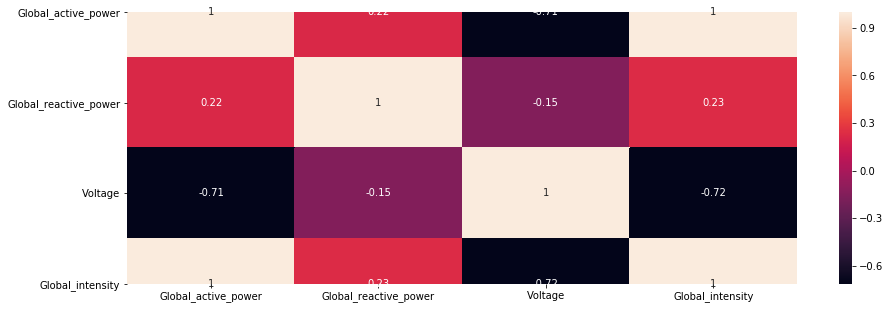

In [98]:
plt.figure(figsize=[15,5])
sns.heatmap(sample.corr(),annot=True)
plt.show()

In [10]:
sample.isnull().sum()

Unnamed: 0                0
Time                      0
Global_active_power      29
Global_reactive_power     0
Voltage                   0
Global_intensity         53
Sub_metering_1           39
Sub_metering_2            0
Sub_metering_3            0
dtype: int64

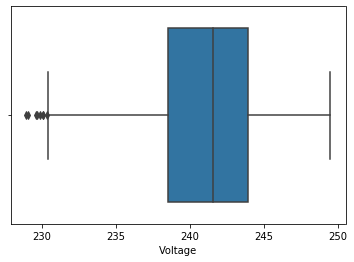

In [11]:
sns.boxplot(sample['Voltage'])

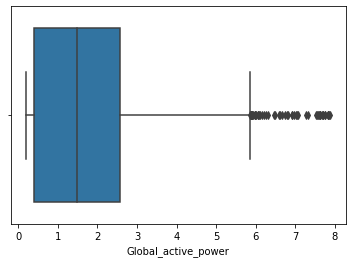

In [12]:
sns.boxplot(sample['Global_active_power'])

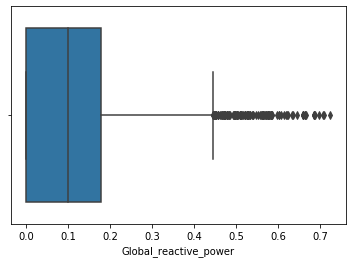

In [13]:
sns.boxplot(sample['Global_reactive_power'])

# DATA CLEANING

In [14]:
sample.drop(['Unnamed: 0','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
sample['Global_active_power'].median()

1.48

In [16]:
sample['Global_active_power'].fillna(sample['Global_active_power'].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
sample['Global_intensity'].fillna(sample['Global_intensity'].median(),inplace=True)

In [18]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2006-12-16 to 2006-12-23
Data columns (total 4 columns):
Global_active_power      10000 non-null float64
Global_reactive_power    10000 non-null float64
Voltage                  10000 non-null float64
Global_intensity         10000 non-null float64
dtypes: float64(4)
memory usage: 710.6 KB


# DATA TRANFORMATION

In [22]:
sy=sample['Global_intensity']

In [23]:
SX=sample[['Global_active_power','Global_reactive_power','Voltage']]


# PRE PROCESSED DATA SPLITTING

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X_train, x_test, y_train, y_test = train_test_split(SX,sy,test_size=0.20,random_state=26)

# MODELLING

In [26]:
regr=LinearRegression()
regr.fit(X_train,y_train)
prediction=regr.predict(x_test)
regr.score(X_train,y_train)

0.9909330391524589

# RESULTS

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_test,prediction))
rms

0.5338876099804916

# FULL DATASET LINEAR ALGORITHM

# DATA ANALYSIS

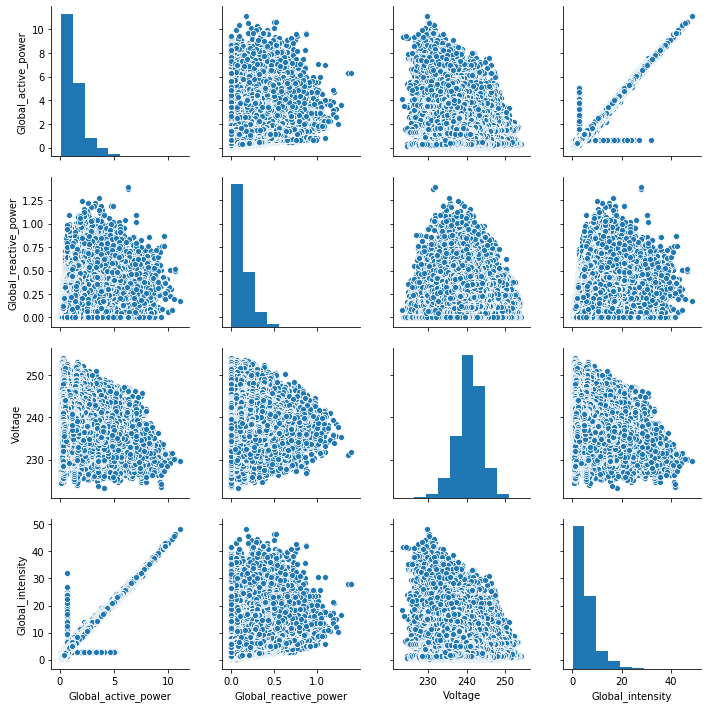

In [100]:
sns.pairplot(cdf)

In [28]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1849280 entries, 2006-12-16 to 2010-02-07
Data columns (total 9 columns):
Unnamed: 0               int64
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(1)
memory usage: 141.1+ MB


In [29]:
cdf.corr()#checking co-relation of features

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Unnamed: 0,1.000000,-0.021192,0.048311,0.278375,-0.026335,-0.007346,-0.034708,0.080740
Global_active_power,-0.021192,1.000000,0.250001,-0.397770,0.998920,0.485627,0.437460,0.634829
Global_reactive_power,0.048311,0.250001,1.000000,-0.116041,0.268457,0.130711,0.140119,0.084316
Voltage,0.278375,-0.397770,-0.116041,1.000000,-0.409553,-0.196699,-0.168990,-0.264535
Global_intensity,-0.026335,0.998920,0.268457,-0.409553,1.000000,0.490148,0.443356,0.622682
Sub_metering_1,-0.007346,0.485627,0.130711,-0.196699,0.490148,1.000000,0.055715,0.104600
Sub_metering_2,-0.034708,0.437460,0.140119,-0.168990,0.443356,0.055715,1.000000,0.080673
Sub_metering_3,0.080740,0.634829,0.084316,-0.264535,0.622682,0.104600,0.080673,1.000000


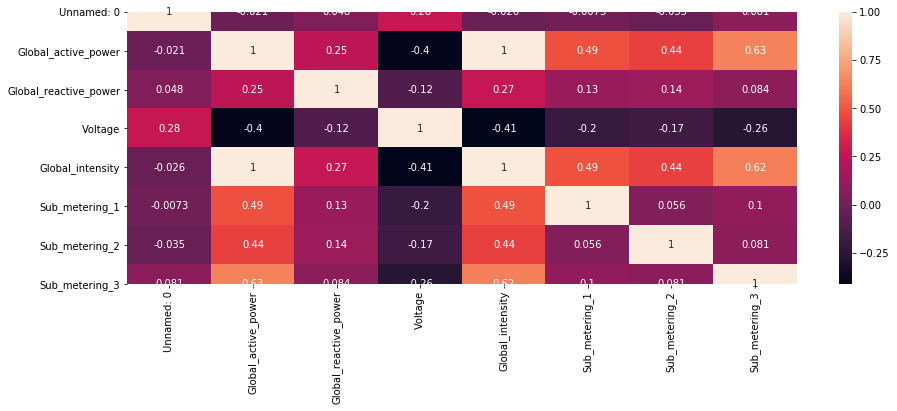

In [30]:
plt.figure(figsize=[15,5])
sns.heatmap(cdf.corr(),annot=True)
plt.show()

In [31]:
cdf.isnull().sum()

Unnamed: 0                  0
Time                        0
Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [32]:
cdf.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.849280e+06,1.847283e+06,1.848841e+06,1.847276e+06,1.847469e+06,1.848078e+06,1.848152e+06,1.849151e+06
mean,9.300151e+05,1.109487e+00,1.225881e-01,2.408008e+02,4.701519e+00,1.157207e+00,1.333928e+00,6.527056e+00
std,5.369280e+05,1.074531e+00,1.122589e-01,3.285449e+00,4.517695e+00,6.262426e+00,5.960130e+00,8.466702e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.662518e+05,3.100000e-01,4.800000e-02,2.389000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.285865e+05,6.200000e-01,1.000000e-01,2.409800e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.394411e+06,1.544000e+00,1.920000e-01,2.429000e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.862793e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


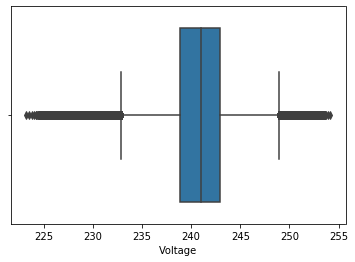

In [33]:
sns.boxplot(cdf['Voltage'])

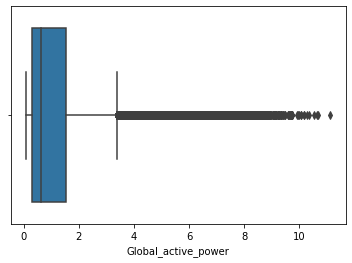

In [34]:
sns.boxplot(cdf['Global_active_power'])

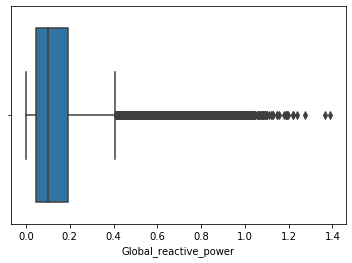

In [35]:
sns.boxplot(cdf['Global_reactive_power'])

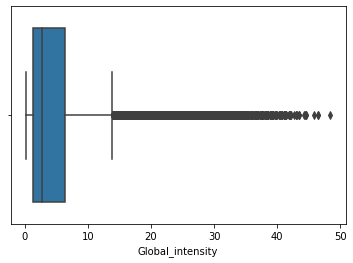

In [36]:
sns.boxplot(cdf['Global_intensity'])

# DATA CLEANING

In [37]:
cdf.drop(['Unnamed: 0','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
cdf.shape

(1849280, 4)

In [39]:
cdf['Global_active_power'].fillna(cdf['Global_active_power'].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
cdf['Global_reactive_power'].fillna(cdf['Global_reactive_power'].median(),inplace=True)

In [41]:
cdf['Voltage'].fillna(cdf['Voltage'].median(),inplace=True)

In [42]:
cdf['Global_intensity'].fillna(cdf['Global_intensity'].median(),inplace=True)

# DATA TRANFORMATION

In [43]:
y=cdf['Global_intensity']

In [44]:
X=cdf[['Global_active_power','Global_reactive_power','Voltage']]

# PRE PROCESSED DATA SPLITTING

In [45]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=26)

# MODELLING

In [46]:
regr=LinearRegression()
regr.fit(X_train,y_train)
prediction=regr.predict(x_test)
regr.score(X_train,y_train)

0.9959897913024569

# RESULTS

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_test,prediction))
rms

0.2715964964609636

# Original dataset

# FULL DATASET CLASSIFICATION ALGORITHMS

In [48]:
import pandas as pd
df=pd.read_csv("hpc_breakdowns.csv",parse_dates=['Date'],index_col=['Date'])
bdf=df.iloc[0:-200000,:]

In [49]:
bdf

,Unnamed: 0,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,,
2006-12-16,0,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,1,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,2,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,3,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,4,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2010-02-07,1862789,07:53:00,0.450,0.322,236.90,2.4,0.0,2.0,1.0
2010-02-07,1862790,07:54:00,0.386,0.216,236.69,1.8,0.0,0.0,0.0
2010-02-07,1862791,07:55:00,0.378,0.204,236.54,1.8,0.0,0.0,1.0


In [51]:
bdf.loc[bdf['Global_intensity']<=15,'Global_intensity']=0

In [52]:
bdf.loc[bdf['Global_intensity']>15,'Global_intensity']=1

# DATA ANALYSIS

In [53]:
import seaborn as sns
#sns.pairplot(bdf)

In [54]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1849280 entries, 2006-12-16 to 2010-02-07
Data columns (total 9 columns):
Unnamed: 0               int64
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(1)
memory usage: 141.1+ MB


In [55]:
bdf.corr()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Unnamed: 0,1.000000,-0.021192,0.048311,0.278375,-0.048525,-0.007346,-0.034708,0.080740
Global_active_power,-0.021192,1.000000,0.250001,-0.397770,0.642825,0.485627,0.437460,0.634829
Global_reactive_power,0.048311,0.250001,1.000000,-0.116041,0.160056,0.130711,0.140119,0.084316
Voltage,0.278375,-0.397770,-0.116041,1.000000,-0.256595,-0.196699,-0.168990,-0.264535
Global_intensity,-0.048525,0.642825,0.160056,-0.256595,1.000000,0.545367,0.437535,0.200231
Sub_metering_1,-0.007346,0.485627,0.130711,-0.196699,0.545367,1.000000,0.055715,0.104600
Sub_metering_2,-0.034708,0.437460,0.140119,-0.168990,0.437535,0.055715,1.000000,0.080673
Sub_metering_3,0.080740,0.634829,0.084316,-0.264535,0.200231,0.104600,0.080673,1.000000


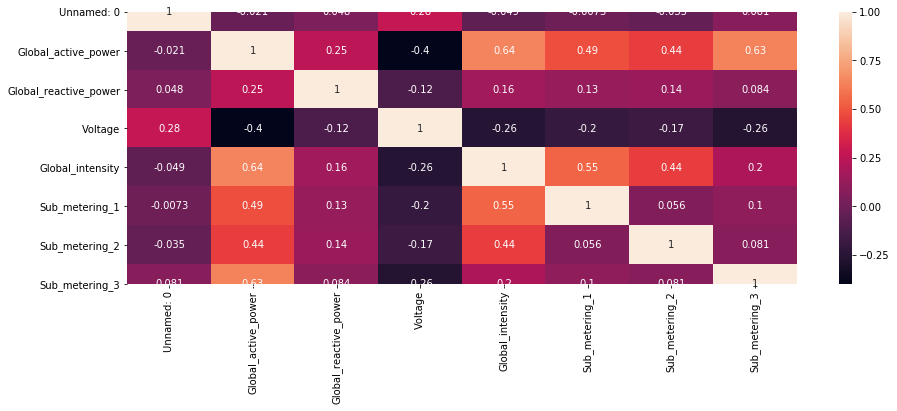

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.heatmap(bdf.corr(),annot=True)
plt.show()

In [57]:
bdf.isnull().sum()

Unnamed: 0                  0
Time                        0
Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [58]:
bdf.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.849280e+06,1.847283e+06,1.848841e+06,1.847276e+06,1.847469e+06,1.848078e+06,1.848152e+06,1.849151e+06
mean,9.300151e+05,1.109487e+00,1.225881e-01,2.408008e+02,4.004451e-02,1.157207e+00,1.333928e+00,6.527056e+00
std,5.369280e+05,1.074531e+00,1.122589e-01,3.285449e+00,1.960637e-01,6.262426e+00,5.960130e+00,8.466702e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.662518e+05,3.100000e-01,4.800000e-02,2.389000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.285865e+05,6.200000e-01,1.000000e-01,2.409800e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.394411e+06,1.544000e+00,1.920000e-01,2.429000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.862793e+06,1.112200e+01,1.390000e+00,2.541500e+02,1.000000e+00,8.800000e+01,8.000000e+01,3.100000e+01


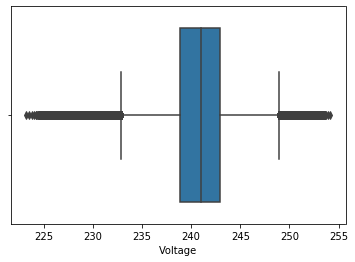

In [59]:
sns.boxplot(bdf['Voltage'])

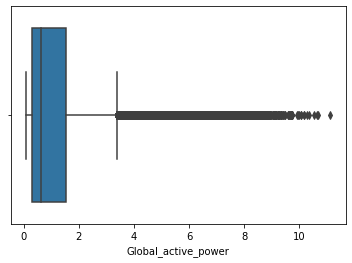

In [60]:
sns.boxplot(bdf['Global_active_power'])

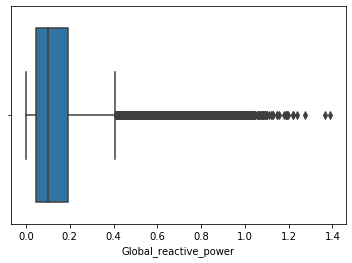

In [61]:
sns.boxplot(bdf['Global_reactive_power'])

# DATA CLEANING

In [62]:
bdf.drop(['Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
bdf.shape

(1849280, 5)

In [64]:
bdf.isnull().sum()

Unnamed: 0                  0
Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
dtype: int64

In [65]:
bdf['Global_active_power'].fillna(bdf['Global_active_power'].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [66]:
bdf['Global_reactive_power'].fillna(bdf['Global_reactive_power'].median(),inplace=True)

In [67]:
bdf['Voltage'].fillna(bdf['Voltage'].median(),inplace=True)

In [68]:
bdf['Global_intensity'].fillna(bdf['Global_intensity'].median(),inplace=True)

In [69]:
bdf.isnull().sum()

Unnamed: 0               0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
dtype: int64

In [70]:
bdf.shape

(1849280, 5)

# DATA TRANFORMATION

In [71]:
ys=bdf['Global_intensity']

In [72]:
Xs=bdf[['Global_active_power','Global_reactive_power','Voltage']]

# PREPROCESSED DATA SPLITTING

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:

from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(Xs,ys,test_size=0.30,random_state=26)
X_train=X_train.sample(n=5000)
y_train=y_train.sample(n=5000)


# Modelling

In [76]:
ran = RandomForestClassifier(random_state=1)
log = LogisticRegression()
svc = SVC(probability=True)



models = [ran,log,svc]         
scores = []

for mod in models:
    mod.fit(X_train,y_train)
    acc = cross_val_score(mod,X_train,y_train,scoring = "accuracy", cv =5)
    scores.append(acc.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [80]:
results = pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression','SVC'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df

,Model,Score
0,Logistic Regression,0.956400
1,SVC,0.956400
2,Random Forest,0.954199


# hyperparameter Tuning

In [81]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True,cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9564
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:  4.4min finished


In [82]:
import numpy as np
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.9564
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [83]:
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

hyperparams = {'C': Cs, 'gamma' : gammas}


gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")


gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 48.9min finished


0.9564
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [84]:
ran = RandomForestClassifier(n_estimators=10,
                             max_depth=3, 
                             max_features=3,
                             min_samples_leaf=2, 
                             min_samples_split=8,  
                             random_state=1)


log = LogisticRegression(C=2.7825594022071245,
                         penalty='l2')

svc = SVC(probability=True)




models = [ran,log,svc]         
scores_v3 = []


for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv=5)
    scores_v3.append(acc.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [85]:
results = pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression','SVC',],
    'Original Score': scores,'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df

,Model,Original Score,Score with tuned parameters
0,Random Forest,0.954199,0.9564
1,Logistic Regression,0.956400,0.9564
2,SVC,0.956400,0.9564


In [90]:
yprediction=log.predict(x_test)

In [91]:
yactual=y_test

# RESULTS

In [92]:
from sklearn.metrics import classification_report# another way of getting score from precision & recall

print(classification_report(yprediction,yactual))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    554784
         1.0       0.00      0.00      0.00         0

    accuracy                           0.96    554784
   macro avg       0.50      0.48      0.49    554784
weighted avg       1.00      0.96      0.98    554784



In [93]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(yactual,yprediction))# yactual yprediction in sequence..prediction on top.

[[532627      0]
 [ 22157      0]]
